In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from run_evolution import folder_evol
from scipy.special import jv, k0, k1

In [4]:
def ind(N, a):
    return f"{N=:d}_{a=:0.3f}"

In [5]:
g = 1 / 5
v, Q = 1, 1
D0, D, tol = 64, 64, 1e-6
#
Nas =  [(256, 0.5), (512, 0.25)]

data = {}

m = 0
for N, a in Nas:
    dt = 1/8
    folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol)
    data[ind(N, a)] = np.load(folder / f"results.npy", allow_pickle=True).item()

T00 - T00(t=0);  We might avarage over [2*l, 2*l+1] sites.


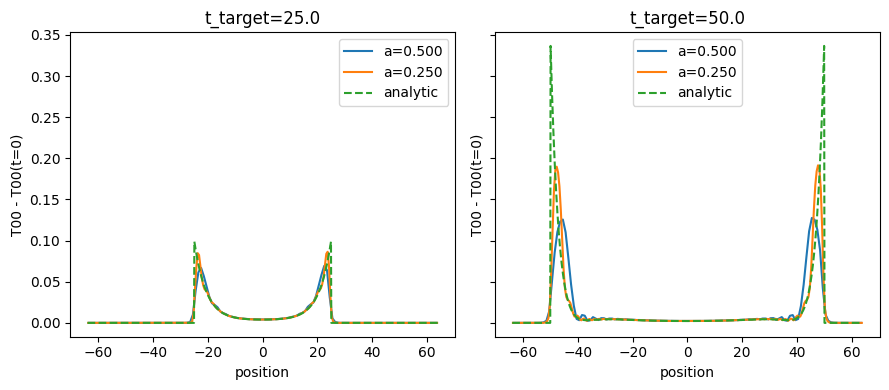

In [6]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T00 - T00(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["T00"][0]
        ee = data[ind(N, a)]["T00"][ii]
        ee = ee - ee0

        ns = a * (np.arange(N) - (N - 1) / 2)

        ee = (ee[0::2] + ee[1::2]) / 2  # avarage over 2*n and 2*n+1
        ns = (ns[0::2] + ns[1::2]) / 2  # avarage over 2*n and 2*n+1
        ax[j].plot(ns, ee, label=f"{a=:0.3f}")

    xmax = 64
    N = 1024
    mb = g / np.sqrt(np.pi)
    x = np.linspace(-xmax, xmax, N)
    t = t_target
    tl0 = t**2 - x**2
    tl = tl0.copy()
    tl[tl0 <= 0] = 1e-10
    arg = mb * np.sqrt(tl)
    aT00 = jv(0,  arg) ** 2 + (t**2 + x**2) * jv(1, arg)**2 / tl
    aT00 *= (mb ** 2) * np.pi / 2
    aT00[tl0 <= 0] = 0
    ax[j].plot(x, aT00, '--', label='analytic')
    ax[j].legend()

fig.tight_layout()


T11; We avarage over [2*l, 2*l+1] sites, and subtract initial value.

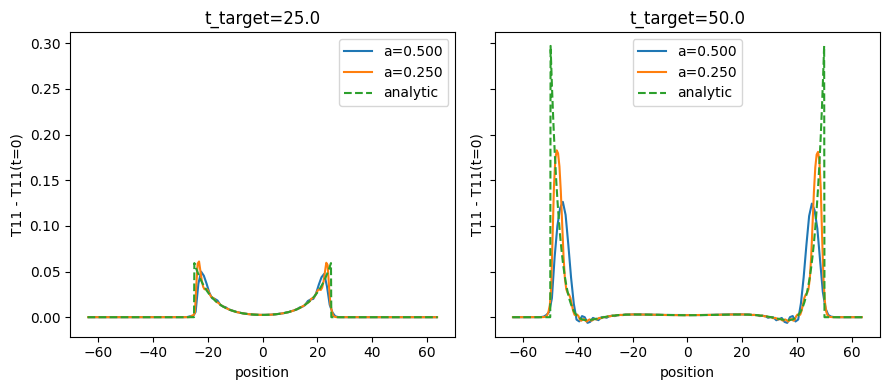

In [7]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T11 - T11(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["T11"][0]
        ee = data[ind(N, a)]["T11"][ii]
        ee = ee - ee0

        ns = a * (np.arange(N) - (N - 1) / 2)

        ee = (ee[0::2] + ee[1::2]) / 2  # avarage over 2*n and 2*n+1
        ns = (ns[0::2] + ns[1::2]) / 2  # avarage over 2*n and 2*n+1
        ax[j].plot(ns, ee, label=f"{a=:0.3f}")

    xmax = 64
    N = 1024
    mb = g / np.sqrt(np.pi)
    x = np.linspace(-xmax, xmax, N)
    t = t_target
    tl0 = t**2 - x**2
    tl = tl0.copy()
    tl[tl0 <= 0] = 1e-10
    arg = mb * np.sqrt(tl)
    aT11 = - jv(0,  arg) ** 2 + (t**2 + x**2) * jv(1, arg)**2 / tl
    aT11 *= (mb ** 2) * np.pi / 2
    aT11[tl0 <= 0] = 0
    ax[j].plot(x, aT11, '--', label='analytic')
    ax[j].legend()

fig.tight_layout()

T01 - T01(t=0); We can avarage over [2*l, 2*l+1] sites.

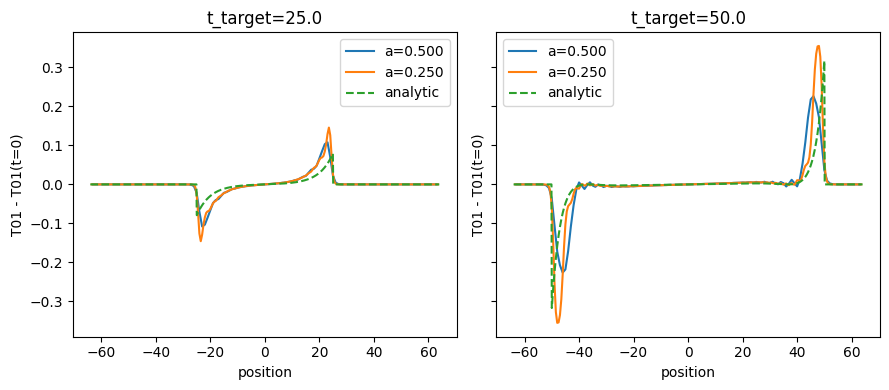

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T01 - T01(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["T01"][0]
        ee = data[ind(N, a)]["T01"][ii]
        ee = ee - ee0

        ns = a * (np.arange(1, N-1) - (N - 1) / 2)

        ee = (ee[0::2] + ee[1::2]) / 2  # avarage over 2*n and 2*n+1
        ns = (ns[0::2] + ns[1::2]) / 2  # avarage over 2*n and 2*n+1
        ax[j].plot(ns, ee, label=f"{a=:0.3f}")

    xmax = 64
    N = 1024
    mb = g / np.sqrt(np.pi)
    x = np.linspace(-xmax, xmax, N)
    t = t_target
    tl0 = t**2 - x**2
    tl = tl0.copy()
    tl[tl0 <= 0] = 1e-10
    arg = mb * np.sqrt(tl)
    aT01 = (t * x) * jv(1, arg)**2 / tl
    aT01 *= (mb ** 2) * np.pi
    aT01[tl0 <= 0] = 0
    ax[j].plot(x, aT01, '--', label='analytic')
    ax[j].legend()

fig.tight_layout()

# factor of 2 seems to be missing

j0; subtract j0(t=0)

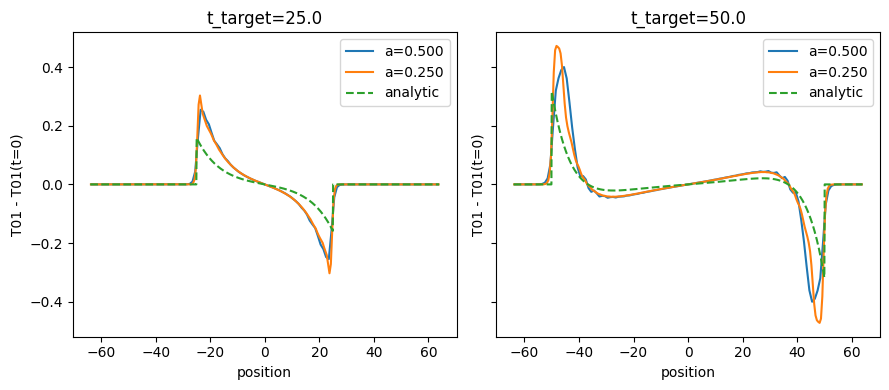

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T01 - T01(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["j0"][0]
        ee = data[ind(N, a)]["j0"][ii]
        ee = ee - ee0

        ns = a * (np.arange(0.5, N, 2) - (N - 1) / 2)

        ax[j].plot(ns, ee, label=f"{a=:0.3f}")

    xmax = 64
    N = 1024
    mb = g / np.sqrt(np.pi)
    x = np.linspace(-xmax, xmax, N)
    t = t_target
    tl0 = t**2 - x**2
    tl = tl0.copy()
    tl[tl0 <= 0] = 1e-10
    arg = mb * np.sqrt(tl)
    aj0 = -mb * (x / np.sqrt(tl)) * jv(1, arg)
    aj0[tl0 <= 0] = 0
    ax[j].plot(x, aj0, '--', label='analytic')
    ax[j].legend()

fig.tight_layout()

# factor of 2 missing somewhere


j1;

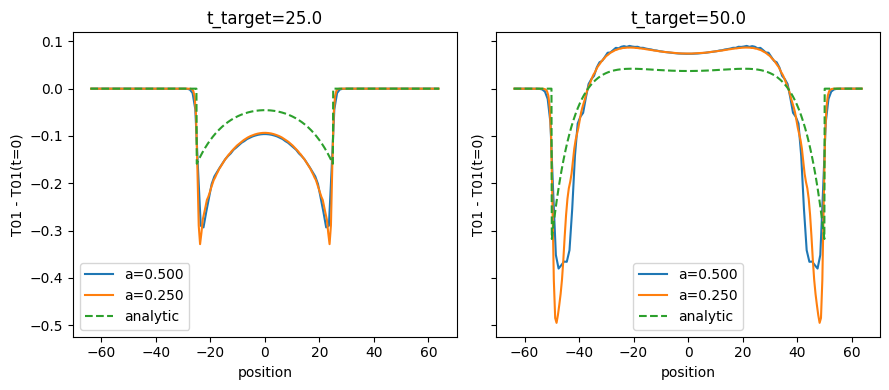

In [16]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T01 - T01(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["j1"][0]
        ee = data[ind(N, a)]["j1"][ii]
        ee = ee - ee0

        ns = a * (np.arange(0.5, N, 2) - (N - 1) / 2)

        ax[j].plot(ns, ee, label=f"{a=:0.3f}")

    xmax = 64
    N = 1024
    mb = g / np.sqrt(np.pi)
    x = np.linspace(-xmax, xmax, N)
    t = t_target
    tl0 = t**2 - x**2
    tl = tl0.copy()
    tl[tl0 <= 0] = 1e-10
    arg = mb * np.sqrt(tl)

    aj1 = - mb * (t / np.sqrt(tl)) * jv(1, arg)
    aj1[tl0 <= 0] = 0
    ax[j].plot(x, aj1, '--', label='analytic')
    ax[j].legend()

fig.tight_layout()

# factor of 2 missing somewhere


condensate

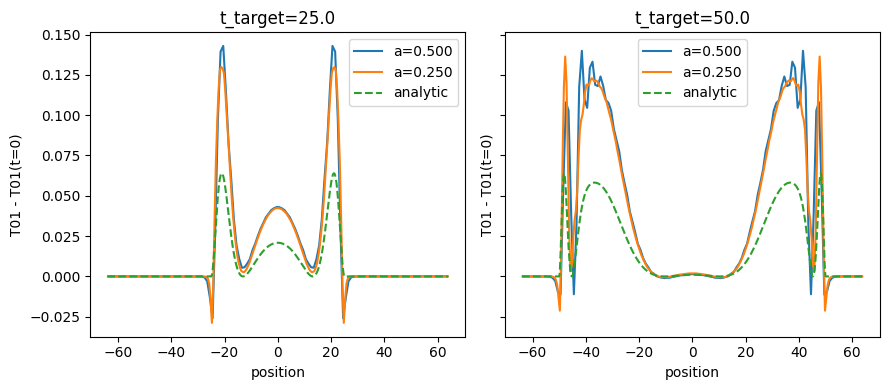

In [18]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T01 - T01(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["nu"][0]
        ee = data[ind(N, a)]["nu"][ii]
        ee = ee - ee0

        ns = a * (np.arange(0.5, N, 2) - (N - 1) / 2)

        ax[j].plot(ns, ee, label=f"{a=:0.3f}")

    xmax = 64
    N = 1024
    mb = g / np.sqrt(np.pi)
    x = np.linspace(-xmax, xmax, N)
    t = t_target
    tl0 = t**2 - x**2
    tl = tl0.copy()
    tl[tl0 <= 0] = 1e-10
    arg = mb * np.sqrt(tl)


    anu = 1 - np.cos(2 * np.pi * (1 - jv(0, arg)))
    anu *= mb * np.exp(0.577215665) / (2 * np.pi)
    anu[tl0 <= 0] = 0
    ax[j].plot(x, anu, '--', label='analytic')
    ax[j].legend()

fig.tight_layout()

# factor of 2 missing somewhere


Ln

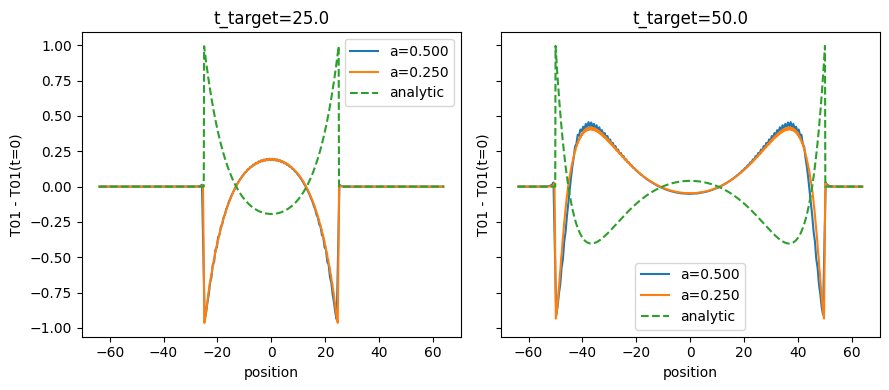

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T01 - T01(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["Ln"][0]
        ee = data[ind(N, a)]["Ln"][ii]
        ee = ee - ee0

        ns = a * (np.arange(N) - (N - 1) / 2)

        ax[j].plot(ns, ee, label=f"{a=:0.3f}")

    xmax = 64
    N = 1024
    mb = g / np.sqrt(np.pi)
    x = np.linspace(-xmax, xmax, N)
    t = t_target
    tl0 = t**2 - x**2
    tl = tl0.copy()
    tl[tl0 <= 0] = 1e-10
    arg = mb * np.sqrt(tl)


    aLn = jv(0, arg)
    aLn[tl0 <= 0] = 0
    ax[j].plot(x, aLn, '--', label='analytic')
    ax[j].legend()

fig.tight_layout()


# minus sign missing somewhere




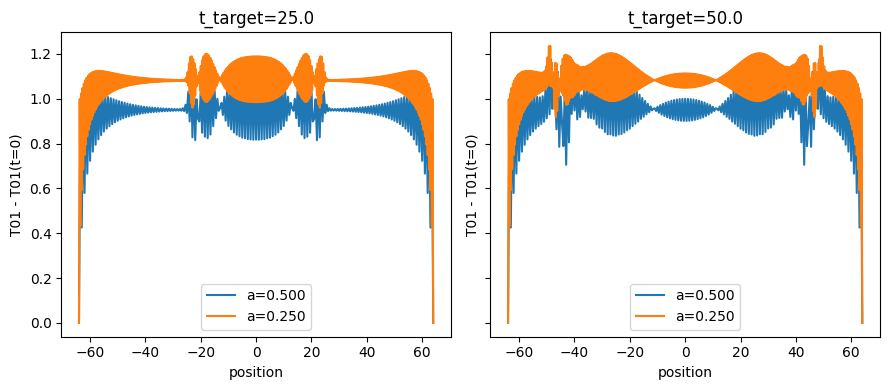

In [21]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("T01 - T01(t=0)")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["entropy_2"][0]
        ee = data[ind(N, a)]["entropy_2"][ii]
        # ee = ee - ee0

        ns = a * (np.arange(N+1) - 0.5 - (N - 1) / 2)

        ax[j].plot(ns, ee, label=f"{a=:0.3f}")


    ax[j].legend()

fig.tight_layout()


# minus sign missing somewhere




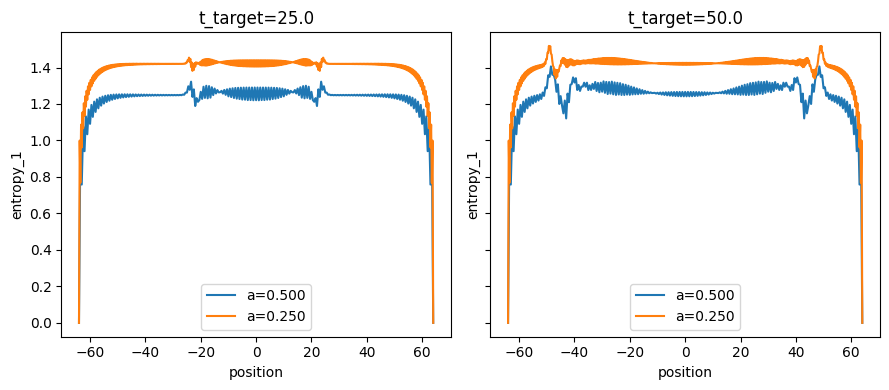

In [39]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))

for j, t_target in enumerate([25, 50]):
    ax[j].set_title(f"{t_target=:0.1f}")
    ax[j].set_xlabel("position")
    ax[j].set_ylabel("entropy_1")
    for N, a in Nas:
        tm = data[ind(N, a)]["time"]
        ii = np.argmin(np.abs(tm - t_target))
        ee0 = data[ind(N, a)]["entropy_1"][0]
        ee = data[ind(N, a)]["entropy_1"][ii]
        # ee = ee - ee0

        ns = a * (np.arange(N+1) - 0.5 - (N - 1) / 2)


        ax[j].plot(ns, ee, label=f"{a=:0.3f}")


    ax[j].legend()

fig.tight_layout()






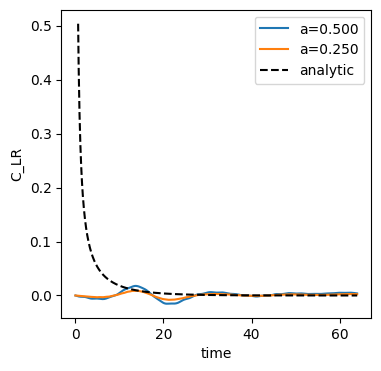

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(4, 4))

ax.set_xlabel("time")
ax.set_ylabel("C_LR")

for N, a in Nas:
    tm = data[ind(N, a)]["time"]

    ee0 = data[ind(N, a)]["entropy_1"][0, N//2]
    ee = data[ind(N, a)]["entropy_1"][:, N//2]
    dee = (ee[1:] - ee[:-1]) / (tm[1:] - tm[:-1])
    tm2 = (tm[1:] + tm[:-1]) / 2

    ax.plot(tm2, dee, label=f"{a=:0.3f}")

aent = (mb / 3) * k1(mb * tm2)
ax.plot(tm2[10:], aent[10:], '--k', label=f"analytic")


ax.legend()


